- Compare trajectories from OTC'd MOTChallenge Videos with its Ground Truth

### Get GT

In [8]:
%reset -f

import os
import pandas as pd
import matplotlib.pyplot as plt

from scripts.plotfunctions import tracklength

with open('Z:/04_Daten/MOT17/train/MOT17-04-FRCNN/gt/gt.txt') as MOTFile:
    GT = pd.DataFrame(MOTFile.readlines()).reset_index()

GT = GT.rename(columns={0: 'temp'})
cols = ['frame', 'track-id', 'x', 'y', 'w', 'h', 'g', 'j', 'conf']
GT[cols] = GT['temp'].str.split(',', expand=True).reset_index(drop=True)

GT[cols] = GT[cols].astype('float64')

del GT['temp'], GT['g'], GT['j'], GT['conf']

GT['class'] = 'Ground Truth'

# Change Coordinates to smaller video resolution
GTBox = [800,450]
GT[['x0', 'w']] = GT[['x', 'w']] * (GTBox[0]/1920)
GT[['y0', 'h']] = GT[['y', 'h']] * (GTBox[1]/1080)

GT['x0'] = GT['x0'] + GT['w'] / 2
GT['y0'] = GT['y0'] + GT['h'] / 2

GT = tracklength(GT)

tracklength...


### Get ottrk

In [9]:
from scripts.plotfunctions import ottrk_to_txt


dirpath = "Z:/04_Daten/MOT17/train/MOT17-04-FRCNN"
filename = "2024-03-29_20-00-00_MOT17_04_FCRNN_resized"
fileending = '.ottrk'
filepath = os.path.join(dirpath, filename) + fileending

OTCdetections, metadata = ottrk_to_txt(filepath = filepath, export=False)
OTCdetections = OTCdetections.sort_values(by=['track-id', 'frame'])
OTC = tracklength(OTCdetections)
OTC['class'] = 'OTC Pipeline'
width = metadata.loc['width', 'video']
height = metadata.loc['height', 'video']
OTCBox = [width, height]

del width, height

ottrk_to_txt...
tracklength...


### Plot

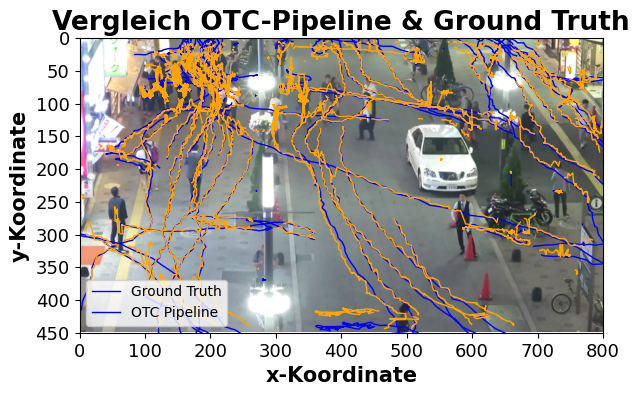

In [10]:
from scripts.plotfunctions import plot_trajectory
fontsize = 15
titletext = "Vergleich OTC-Pipeline & Ground Truth"
show_background = True,
savename = "12_Vergleich_OTC_GT"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot GT
grouped_df = GT.groupby(['track-id'])
# Iteration durch die Gruppen und Plotten der Trajektorien
for group_name, group_df in grouped_df:
    x = group_df['x0']
    y = group_df['y0']
    plt.plot(x, y, label=f'Track ID: {group_name}', linewidth=1, color='blue')

# PLot OTC
grouped_df = OTC.groupby(['track-id'])
# Iteration durch die Gruppen und Plotten der Trajektorien
for group_name, group_df in grouped_df:
    x = group_df['x0']
    y = group_df['y0']
    plt.plot(x, y, label=f'Track ID: {group_name}', linewidth=1, color='orange')


# Plot-Einstellungen
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('x-Koordinate', size=fontsize, weight = 'bold') 
plt.ylabel('y-Koordinate', size=fontsize, weight = 'bold')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)


leg1 = plt.legend(['Ground Truth', 'OTC Pipeline'], fontsize=10)#.get_legend()
# leg2 = leg1.get_legend()


# plt.xlim(0, 1296)
# plt.ylim(0, 972)
plt.xlim(0, GTBox[0])
plt.ylim(0, GTBox[1])
plt.gca().invert_yaxis()

# Hintergrundbild
background = mpimg.imread("Z:/04_Daten/MOT17/train/MOT17-04-FRCNN/Screenshot.png")
plt.imshow(background)

if titletext !="":
    plt.title(titletext, fontsize=fontsize+4, weight='bold')

if savename != "":
    plt.savefig("Z:/Masterthesis/Images/" + savename + ".png")

### Events vergleichen

In [11]:
from scripts.GTCompare import import_analyze_export as iae

iae(directory=dirpath, Fall = filename)
iae(directory="Z:/04_Daten/MOT17/train/MOT17-04-FRCNN", Fall = "2024-03-29_20-00-00_MOT17_04_FCRNN_resized")

4it [00:00, 118.63it/s]


  road_user_type event_type2  OTAnalytics_0  OTGroundTruth  Differenz  \
0      bicyclist  No Section              4            NaN        NaN   
1            car  No Section              1            NaN        NaN   
2          other  No Section              2            NaN        NaN   
3     pedestrian        Flow             21           31.0       10.0   
4     pedestrian  No Section            219            NaN        NaN   
5     pedestrian   Section 1             11            NaN        NaN   

   Diff [%]  
0       NaN  
1       NaN  
2       NaN  
3      32.3  
4       NaN  
5       NaN  


4it [00:00, 499.52it/s]

  road_user_type event_type2  OTAnalytics_0  OTGroundTruth  Differenz  \
0      bicyclist  No Section              4            NaN        NaN   
1            car  No Section              1            NaN        NaN   
2          other  No Section              2            NaN        NaN   
3     pedestrian        Flow             21           31.0       10.0   
4     pedestrian  No Section            219            NaN        NaN   
5     pedestrian   Section 1             11            NaN        NaN   

   Diff [%]  
0       NaN  
1       NaN  
2       NaN  
3      32.3  
4       NaN  
5       NaN  


In [12]:
# %reset -f

import os
import pandas as pd
import bz2
import ujson
# from scripts.convertfunctions import events_to_df

def events_to_df(filepath, key = 'event_list'):
    # Open otevents-file
    with bz2.open(filepath, "rt", encoding="UTF-8") as file:
        dictfile = ujson.load(file)
    
    # Convert to DataFrame
    EVENTS = pd.DataFrame.from_dict(dictfile[key])

    return EVENTS

# dir = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/vary_sigmaIOU"
dir = "./test/SigmaIOUVariance"
events_to_df(dir)

PermissionError: [Errno 13] Permission denied: './test/SigmaIOUVariance'

In [16]:
%reset -f

import os
import pandas as pd
import bz2
import ujson
from scripts.GTCompare import import_analyze_export as iae

current_directory = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/vary_sigmaIOU"

def extract_data_from_otevents(otevents_file):
    # Dateiinhalt einlesen
    with bz2.open(otevents_file, "rt", encoding="UTF-8") as file:
        dictfile = ujson.load(file)
    
    # Convert to DataFrame
    df = pd.DataFrame.from_dict(dictfile['event_list'])
    df["Sigma_IOU"] = os.path.splitext(os.path.basename(otevents_file))[0]
    return df

dfs = []
def process_otevents_files(directory="."):
    # Durchsuche das angegebene Verzeichnis nach Dateien mit der Endung ".otevents"
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".otevents"):
                # Extrahiere den Dateinamen (ohne Erweiterung)
                filename = os.path.splitext(file)[0]
                
                # Extrahiere die Daten aus der .otevents-Datei und erstelle ein DataFrame
                df = extract_data_from_otevents(os.path.join(root, file))
                
                dfs.append(df)
                # Speichere den DataFrame mit dem Dateinamen als Variable
                # globals()[filename] = df
    
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df    

# Testen der Funktion mit dem aktuellen Verzeichnis


events = process_otevents_files(current_directory)


# iae(directory=dirpath, Fall = filename)
# iae(directory="Z:/04_Daten/MOT17/train/MOT17-04-FRCNN", Fall = "2024-03-29_20-00-00_MOT17_04_FCRNN_resized")
